<a href="https://colab.research.google.com/github/erikk-avans/Machine-Learning/blob/master/Synthetische_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inleiding

In dit notebook zullen we een eenvoudige manier laten zien om synthetische data te genereren met behulp van de SDV-bibliotheek. Synthetische data is kunstmatig gegenereerde data die de statistische eigenschappen van echte gegevens nabootst, maar geen echte persoonlijke informatie bevat. Dit is handig als je met data wil werken met privacy-gevoelige informatie.

We gaan stapsgewijs door het proces heen, van het inladen van een dataset tot het genereren en downloaden van synthetische data.

## Stap 1: Installeren van de SDV-bibliotheek


In [ ]:
!pip install sdv
import pandas as pd
import json
import requests



*   Hier worden de SDV-bibliotheek en andere benodigde bibliotheken geïnstalleerd. SDV wordt gebruikt om synthetische data te genereren die lijkt op echte datasets.




## Stap 2: Laden van de metadata en echte data

De **metadata** beschrijft de structuur van de dataset (zoals kolomnamen en datatypes bijvoorbeeld tekst, getallen of datums). De **data** is de daadwerkelijke dataset die we gebruiken als basis om synthetische data te genereren. Deze bevat de feitelijke waarden in de vorm van rijen en kolommen.

### Metadata

In [ ]:
url_meta='https://drive.google.com/file/d/1zFYbI_jWbUevAAtf75fBhT7eyAwYlHCi/view?usp=share_link'
url_meta='https://drive.google.com/uc?id=' + url_meta.split('/')[-2]

response = requests.get(url_meta)
metadata_dict = response.json()

*   Het script downloadt een JSON-bestand van Google Drive en converteert het naar een Python-woordenboek (metadata_dict), dat later wordt gebruikt om de structuur van de dataset te begrijpen.




### Dataset

In [ ]:
''' url_real='https://drive.google.com/file/d/1TJH0gsRFZee98ll7w6zzDKczkh6di6xf/view?usp=sharing' '''
url_real='https://drive.google.com/file/d/1ESfBNsvQK0-Oa4Q6gA6Q7YF2nL-vpxxP/view?usp=share_link'
url_real='https://drive.google.com/uc?id=' + url_real.split('/')[-2]

real_data = pd.read_csv(url_real)

print(real_data.head())

   Student_ID   Voornaam  Achternaam                     E-mail Geboortedatum  \
0      636404     Nathan     de Smit      nathandesmit@avans.nl    2003-12-30   
1      347387  Alexander       Smits    alexandersmits@avans.nl    2001-12-31   
2      598174     Amelia      Lamore      amelialamore@avans.nl    2005-01-13   
3      685605      Norah    Scharroo     norahscharroo@avans.nl    2002-02-06   
4      302925    Evelien  van Amstel  evelienvanamstel@avans.nl    2006-09-06   

  Geslacht Telefoonnummer                                   Adres  \
0      Man  (065) 2476898      Nadiastraat 606, 4411 YO, Zandberg   
1   Anders  +3188-7515173  Ibrahimring 627, 6495PD, Westernieland   
2    Vrouw    066 2370127               Owenweg 877, 1784XJ, Velp   
3    Vrouw    0011 839451       Suzepad 734, 8974UR, Groot-Ammers   
4    Vrouw  (087)-4452604     Bensingel 613, 6903 UC, Velsen-Zuid   

  Inschrijvingsstatus  Wiskunde  Statistiek  Celbiologie  Microbiologie  
0        Ingeschreven   

*   De echte dataset wordt ook van Google Drive gedownload en ingeladen als een Pandas DataFrame (real_data).
*   Met print(real_data.head()) krijg je een eerste blik op de echte data.



## Stap 3: Metadata configureren

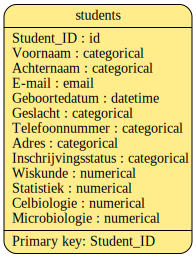

In [ ]:
# Van de bibliotheek SDV (gereedschapskist) willen we het Metadata object (tool) hebben.
from sdv.metadata import Metadata

metadata = Metadata()
metadata = metadata.load_from_dict(metadata_dict)

metadata.visualize()

*   Met de SDV-bibliotheek wordt een Metadata-object aangemaakt op basis van de eerder ingeladen metadata. Dit object wordt gebruikt om de structuur en eigenschappen van de echte data te begrijpen.



## Stap 4: Het aanmaken van de synthesizer

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer

*   We maken gebruik van een bibliotheek genaamd SDV (Synthetic Data Vault). Deze heeft tools om synthetische data te maken en te evalueren. GaussianCopulaSynthesizer helpt ons een model te maken dat echte data nabootst.



## Stap 5: Trainen van de synthesizer

In [ ]:
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data=real_data)
synthetic_data = synthesizer.sample(num_rows=100)
print(synthetic_data.head())

  Student_ID Voornaam   Achternaam                      E-mail Geboortedatum  \
0     S_0034    Mason    Brievingh      lewislaura@example.org    2000-12-14   
1     S_0045   Amelia        Smits     sandramoran@example.org    2005-05-30   
2     S_0000   Amelia       Stange  fernandezpaige@example.net    2004-10-08   
3     S_0039    Sofie   Vastenhouw         james35@example.org    2002-08-01   
4     S_0080  Maarten  van Herstal   anthonycarter@example.com    2004-02-21   

  Geslacht Telefoonnummer                              Adres  \
0      Man  +31934 317093     Loekring 226, 3087QU, Hoogwoud   
1      Man    066 2370127          Owenweg 877, 1784XJ, Velp   
2   Anders    0099 080414   Lindeweg 99, 2659 RV, Nieuwlande   
3      Man  +31934 317093  Tychosingel 50, 7416SE, Dalerveen   
4   Anders    082 1131464   Vincebaan 44, 3802CN, Stellendam   

  Inschrijvingsstatus  Wiskunde  Statistiek  Celbiologie  Microbiologie  
0        Afgestudeerd       9.1         8.9          4.9    



*   We trainen een synthesizer met echte data (real_data).
*   Daarna laten we de synthesizer 100 rijen aan synthetische data genereren (synthetic_data).



## Stap 6 Visualiseren van een kolom

Om te zien hoe goed de synthetische data lijkt op de echte data, maken we een grafiek:

In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='Celbiologie',
    metadata=metadata
)

fig.show()



*   Dit vergelijkt een specifieke kolom, in dit geval 'Celbiologie' tussen echte en synthetische data.
*   Vervang 'Celbiologie' door 'Wiskunde' en beoordeel hoe goed deze kolom door de synthetische data wordt gerepresenteerd.






In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='Wiskunde',
    metadata=metadata
)

fig.show()

## Stap 7 Evalueren van de kwaliteit

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata)


quality_report.get_details(property_name='Column Shapes')



Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 667.18it/s]|
Column Shapes Score: 80.73%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:00<00:00, 169.35it/s]|
Column Pair Trends Score: 42.47%

Overall Score (Average): 61.6%



,Column,Metric,Score
0,Voornaam,TVComplement,0.65
1,Achternaam,TVComplement,0.63
2,Geboortedatum,KSComplement,0.86
3,Geslacht,TVComplement,0.87
4,Telefoonnummer,TVComplement,0.64
5,Adres,TVComplement,0.66
6,Inschrijvingsstatus,TVComplement,0.97
7,Wiskunde,KSComplement,0.83
8,Statistiek,KSComplement,0.92
9,Celbiologie,KSComplement,0.93


In [ ]:
quality_report.get_details(property_name='Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,Voornaam,Achternaam,ContingencySimilarity,0.060000,NaN,NaN
1,Voornaam,Geboortedatum,ContingencySimilarity,0.170000,NaN,NaN
2,Voornaam,Geslacht,ContingencySimilarity,0.350000,NaN,NaN
3,Voornaam,Telefoonnummer,ContingencySimilarity,0.060000,NaN,NaN
4,Voornaam,Adres,ContingencySimilarity,0.080000,NaN,NaN
5,Voornaam,Inschrijvingsstatus,ContingencySimilarity,0.350000,NaN,NaN
6,Voornaam,Wiskunde,ContingencySimilarity,0.140000,NaN,NaN
7,Voornaam,Statistiek,ContingencySimilarity,0.120000,NaN,NaN
8,Voornaam,Celbiologie,ContingencySimilarity,0.210000,NaN,NaN
9,Voornaam,Microbiologie,ContingencySimilarity,0.230000,NaN,NaN


*   Hier analyseren we de kwaliteit van de synthetische data en krijgen gedetailleerde rapporten over:

1.   Hoe de vorm van individuele kolommen overeenkomt.
2.   Hoe trends tussen kolommen overeenkomen.

## Stap 8 Exporteren en downloaden van Excelbestanden

In [ ]:
from google.colab import files

synthetic_data.to_excel("synthetic_data.xlsx", index=False, engine='openpyxl')
real_data.to_excel("real_data.xlsx", index=False, engine='openpyxl')

files.download("synthetic_data.xlsx")
files.download("real_data.xlsx")

*   Tenslotte slaan we de echte en synthetische data op als Excel-bestanden en we maken de bestanden downloadbaar


